In [2]:
import pandas as pd

# Set the file path
file_path = '/Users/dylanfunk/Desktop/Data Analysis Projects/North Sea population tracks of greater white-fronted geese 2014-2017 (data from Klzsch et al. 2019).csv'

# Load the data into a DataFrame
data = pd.read_csv(file_path)

# Preview the first few rows of the dataset
data.head()


,event-id,visible,timestamp,location-long,location-lat,ground-speed,heading,height-above-msl,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,8667493081,True,2014-03-01 00:00:06.000,8.831596,53.676450,0.01,0.0,39.2,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
1,8667493082,True,2014-03-01 00:30:07.000,8.831814,53.676337,0.05,0.0,38.4,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
2,8667493083,True,2014-03-01 01:00:06.000,8.831735,53.676069,0.02,0.0,38.8,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
3,8667493084,True,2014-03-01 01:30:07.000,8.831851,53.675843,0.06,0.0,35.3,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...
4,8667493085,True,2014-03-01 02:00:06.000,8.832654,53.675390,0.04,0.0,42.1,gps,Anser albifrons,3084,Frank_3084,North Sea population tracks of greater white-f...


In [7]:
# Create a copy of the original data to preserve it
data_cleaned = data.copy()

# Select numeric columns from the 'data_cleaned' DataFrame
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Use .loc[] to fill missing values in 'data_cleaned' with their respective medians
data_cleaned.loc[:, numeric_columns] = data_cleaned.loc[:, numeric_columns].fillna(data_cleaned.loc[:, numeric_columns].median())

# Check the cleaned data
data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086662 entries, 0 to 1086661
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   event-id                         1086662 non-null  int64  
 1   visible                          1086662 non-null  bool   
 2   timestamp                        1086662 non-null  object 
 3   location-long                    1086662 non-null  float64
 4   location-lat                     1086662 non-null  float64
 5   ground-speed                     1086662 non-null  float64
 6   heading                          1086662 non-null  float64
 7   height-above-msl                 1086662 non-null  float64
 8   sensor-type                      1086662 non-null  object 
 9   individual-taxon-canonical-name  1086662 non-null  object 
 10  tag-local-identifier             1086662 non-null  int64  
 11  individual-local-identifier      1086662 non-null 

In [8]:
# Fill missing values for non-numeric columns with a placeholder value
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data_cleaned.loc[:, non_numeric_columns] = data.loc[:, non_numeric_columns].fillna('Unknown')


In [9]:
# Convert 'timestamp' to datetime
data_cleaned.loc[:, 'timestamp'] = pd.to_datetime(data_cleaned['timestamp'])

# Check the cleaned data
data_cleaned.info()

# Try specifying the format of the timestamp

data_cleaned.loc[:, 'timestamp'] = pd.to_datetime(data_cleaned['timestamp'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086662 entries, 0 to 1086661
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   event-id                         1086662 non-null  int64  
 1   visible                          1086662 non-null  bool   
 2   timestamp                        1086662 non-null  object 
 3   location-long                    1086662 non-null  float64
 4   location-lat                     1086662 non-null  float64
 5   ground-speed                     1086662 non-null  float64
 6   heading                          1086662 non-null  float64
 7   height-above-msl                 1086662 non-null  float64
 8   sensor-type                      1086662 non-null  object 
 9   individual-taxon-canonical-name  1086662 non-null  object 
 10  tag-local-identifier             1086662 non-null  int64  
 11  individual-local-identifier      1086662 non-null 

           event-id  location-long  location-lat  ground-speed       heading  \
count  1.086662e+06   1.086662e+06  1.086662e+06  1.086662e+06  1.086662e+06   
mean   8.671838e+09   4.377418e+01  6.322754e+01  1.654536e+00  1.234796e+02   
std    3.862558e+07   2.743829e+01  8.060734e+00  4.936236e+00  1.230237e+02   
min    8.667493e+09  -4.948864e-01  4.680207e+01  0.000000e+00  0.000000e+00   
25%    8.667765e+09   2.486086e+01  5.488319e+01  6.000000e-02  0.000000e+00   
50%    8.668037e+09   4.726336e+01  6.576683e+01  1.500000e-01  9.150000e+01   
75%    8.668308e+09   5.601227e+01  6.941056e+01  3.600000e-01  2.265000e+02   
max    9.063774e+09   1.132370e+02  7.616718e+01  9.992000e+01  3.600000e+02   

       height-above-msl  tag-local-identifier  
count      1.086662e+06          1.086662e+06  
mean       6.094297e+01          2.446504e+03  
std        1.129654e+02          1.228158e+03  
min       -9.912000e+02          3.280000e+02  
25%        6.000000e+00          1.0410

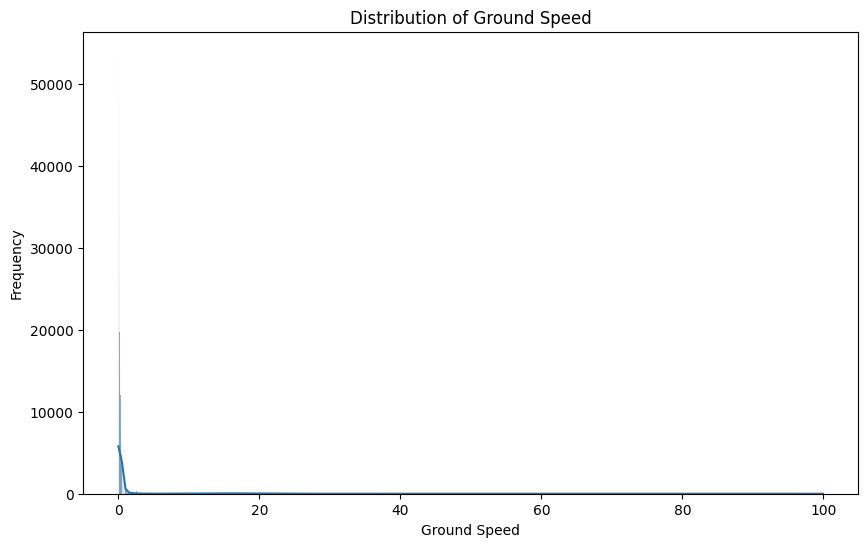

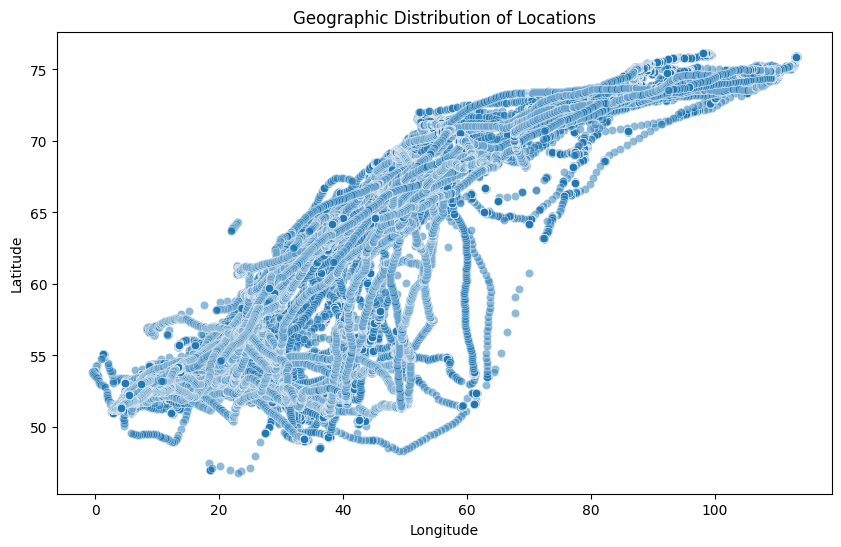

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get summary statistics for numerical columns
print(data_cleaned.describe())

# Plot distribution of numeric columns (e.g., ground-speed, height-above-msl)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['ground-speed'], kde=True)
plt.title('Distribution of Ground Speed')
plt.xlabel('Ground Speed')
plt.ylabel('Frequency')
plt.show()

# Plot location distribution (latitude vs. longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='location-long', y='location-lat', alpha=0.5)
plt.title('Geographic Distribution of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


datetime64[ns]
                 timestamp        date  hour
970085 2017-03-01 00:00:20  2017-03-01     0
970086 2017-03-01 00:30:22  2017-03-01     0
970087 2017-03-01 01:00:20  2017-03-01     1
970088 2017-03-01 01:30:24  2017-03-01     1
970089 2017-03-01 02:00:22  2017-03-01     2


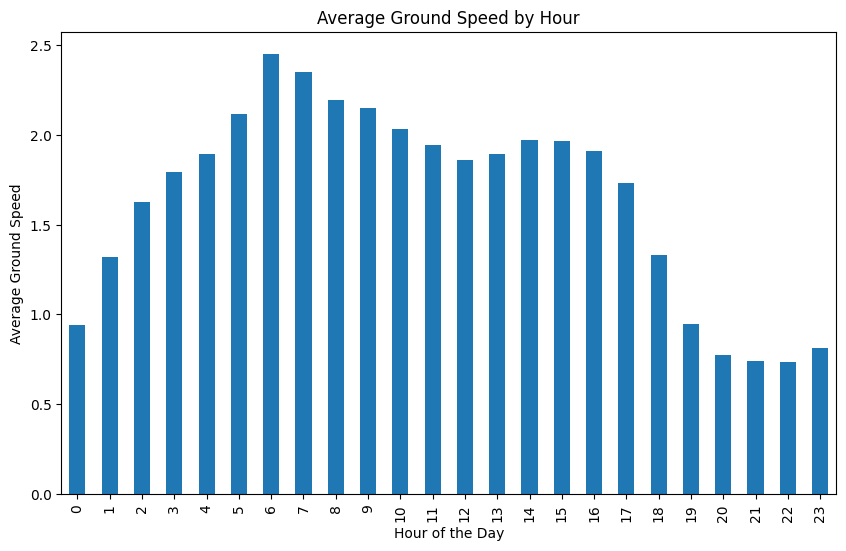

In [33]:
# Ensure the 'timestamp' column is converted to datetime format
data_cleaned['timestamp'] = pd.to_datetime(data_cleaned['timestamp'], errors='coerce')

# Verify the dtype of 'timestamp'
print(data_cleaned['timestamp'].dtype)

# Now extract the date and hour from the timestamp
data_cleaned['date'] = data_cleaned['timestamp'].dt.date
data_cleaned['hour'] = data_cleaned['timestamp'].dt.hour

# Check the results
print(data_cleaned[['timestamp', 'date', 'hour']].head())



# Group by hour to see the distribution of ground speed
hourly_data = data_cleaned.groupby('hour')['ground-speed'].mean()

plt.figure(figsize=(10, 6))
hourly_data.plot(kind='bar')
plt.title('Average Ground Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Ground Speed')
plt.show()


In [34]:
print(data_cleaned[['location-lat', 'location-long']].head())  # Check first few values
print(data_cleaned[['location-lat', 'location-long']].describe())  # Check data range


        location-lat  location-long
970085     53.208142       7.384655
970086     53.208079       7.384843
970087     53.208072       7.384835
970088     53.207923       7.384820
970089     53.208016       7.384874
       location-lat  location-long
count  1.086662e+06   1.086662e+06
mean   6.322754e+01   4.377418e+01
std    8.060734e+00   2.743829e+01
min    4.680207e+01  -4.948864e-01
25%    5.488319e+01   2.486086e+01
50%    6.576683e+01   4.726336e+01
75%    6.941056e+01   5.601227e+01
max    7.616718e+01   1.132370e+02


In [36]:
# Get unique values of 'tag-local-identifier' to see the different birds or tracking devices
unique_birds = data_cleaned['tag-local-identifier'].unique()

# Display the unique values
print(unique_birds)


[1043 1048 1052 1058  338  381  365  387  378  329 1071  341  351  380
  328  340  401  397 1082 3276 2704 3097 3098 3067 3079 2753 3084 3408
 3409 3410 3411 3412 3413 3414 3416 3419 3420 3421 3423 3425 3427 3428
 3429 3430 3431 3432 3437 3438 3440 3442 3443 3445 3446 3447 3448 3449
 3450 3104 3988 2731 4000 3992 1002 1005 1023 1028 1031 1034 1035 1036
 1037 1038 1041 1042 3269 3088 4008 1011 1013 1012 3271]


In [37]:
from IPython.display import display
import folium
import random

# Generate a list of unique colors
# You can use a pre-defined color palette or create a custom color for each bird
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow', 'darkblue', 'brown', 'darkgreen', 
    'gray', 'black', 'cyan', 'magenta', 'gold', 'violet', 'lime', 'indigo', 'turquoise', 'salmon'
]

# Create map centered at the median location
m = folium.Map(location=[data_cleaned['location-lat'].median(), data_cleaned['location-long'].median()], zoom_start=6)

# Create a dictionary to map tag-local-identifier to a color
tag_to_color = {tag: colors[i % len(colors)] for i, tag in enumerate(data_cleaned['tag-local-identifier'].unique())}

# Add markers with color for each bird's path
for _, row in data_cleaned.sample(1000).iterrows():
    # Get the color for the bird based on its tag-local-identifier
    bird_color = tag_to_color[row['tag-local-identifier']]
    
    folium.CircleMarker(
        location=[row['location-lat'], row['location-long']], 
        radius=2, 
        color=bird_color,
        popup=folium.Popup(f"ID: {row['individual-local-identifier']}<br>"
                           f"Speed: {row['ground-speed']} km/h<br>"
                           f"Heading: {row['heading']}°<br>"
                           f"Altitude: {row['height-above-msl']} meters<br>"
                           f"Timestamp: {row['timestamp']}", 
                           max_width=300)
    ).add_to(m)

# Display the map
display(m)


In [ ]:
from IPython.display import display
import folium
import random

# Generate a list of unique colors
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow', 'darkblue', 'brown', 'darkgreen', 
    'gray', 'black', 'cyan', 'magenta', 'gold', 'violet', 'lime', 'indigo', 'turquoise', 'salmon'
]

# Create map centered at the median location
m = folium.Map(location=[data_cleaned['location-lat'].median(), data_cleaned['location-long'].median()], zoom_start=6)

# Create a dictionary to map tag-local-identifier to a color
tag_to_color = {tag: colors[i % len(colors)] for i, tag in enumerate(data_cleaned['tag-local-identifier'].unique())}

# Loop through each bird and plot its path
for bird_id in data_cleaned['tag-local-identifier'].unique():
    # Filter the data for the current bird
    bird_data = data_cleaned[data_cleaned['tag-local-identifier'] == bird_id]
    
    # Sort the data by timestamp to ensure chronological order
    bird_data = bird_data.sort_values(by='timestamp')
    
    # Get the color for the current bird
    bird_color = tag_to_color[bird_id]
    
    # Create a list of coordinates for the PolyLine
    coordinates = bird_data[['location-lat', 'location-long']].values.tolist()
    
    # Add PolyLine to map representing the flight path
    folium.PolyLine(
        locations=coordinates, 
        color=bird_color, 
        weight=2.5, 
        opacity=0.7
    ).add_to(m)
    
    # Add CircleMarkers for each point along the path
    for _, row in bird_data.iterrows():
        folium.CircleMarker(
            location=[row['location-lat'], row['location-long']], 
            radius=3, 
            color=bird_color,
            popup=folium.Popup(f"ID: {row['individual-local-identifier']}<br>"
                               f"Speed: {row['ground-speed']} km/h<br>"
                               f"Heading: {row['heading']}°<br>"
                               f"Altitude: {row['height-above-msl']} meters<br>"
                               f"Timestamp: {row['timestamp']}", 
                               max_width=300)
        ).add_to(m)

# Display the map with the flight paths
display(m)
